# Librerias

In [41]:
# !pip install streamlit
# #https://dashboard.ngrok.com/signup
!pip install --upgrade typing_extensions
!pip install openai
!pip install pypdf
!pip install langchain

^C


In [ ]:
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
import pandas as pd

In [ ]:
loader = PyPDFLoader("llm_doc.pdf")
documento = loader.load()

# Chunks

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size    = 1000,
                                               chunk_overlap = 100)

doc_splits = text_splitter.split_documents(documento)

In [ ]:
doc_splits[2].page_content


'1.\nIntroduction to LLMOps\nGenerative AI models have gained wide popularity in recent times with the adoption of  \ntransformer-based neural network architectures. Generative model’s ability to generate new data \nenables them to go beyond traditional prediction and classification use cases. These models \nare now used across domains and use cases like chatbots, question answering, fraud detection, \nprotein folding and many more.\nGenerative AI models for natural language use cases are powered by Large Language Models (LLMs). \nLLMs are transformer-based Deep Learning architectures that harness vast amounts of textual \ndata to develop language and domain understanding. The models are built with an emphasis on \ngenerating human-like responses and reasoning. Their ability to understand human languages allows \nthem to serve as powerful tools for information retrieval, natural language processing, language \ntranslation and even creative writing.'

In [ ]:
doc_splits[2].metadata

{'source': 'llm_doc.pdf', 'page': 2}

# Vector Store como dataframe

In [ ]:
data = [{'Chunks': doc.page_content, 'Metadata': doc.metadata} for doc in doc_splits]
df_vector_store = pd.DataFrame(data)
df_vector_store.head()

,Chunks,Metadata
0,Building Pipelines and Environments for \nLar...,"{'source': 'llm_doc.pdf', 'page': 0}"
1,Contents\nIntroduction to LLMOps 1\nWhy LLMOps...,"{'source': 'llm_doc.pdf', 'page': 1}"
2,1.\nIntroduction to LLMOps\nGenerative AI mode...,"{'source': 'llm_doc.pdf', 'page': 2}"
3,translation and even creative writing.\nUsing ...,"{'source': 'llm_doc.pdf', 'page': 2}"
4,"with LLMs. Together, these allow data scientis...","{'source': 'llm_doc.pdf', 'page': 2}"


In [ ]:
from openai import OpenAI
import numpy as np
import json
file_name = open('credentials.json')
config_env = json.load(file_name)
api_key = config_env["openai_key"]
client = OpenAI(api_key=api_key)
def text_embedding(text=[]):
    embeddings = client.embeddings.create(model="text-embedding-ada-002",
                                          input=text,
                                          encoding_format="float")
    return embeddings.data[0].embedding

df_vector_store["Embedding"] = df_vector_store["Chunks"].apply(lambda x: text_embedding([x]))
df_vector_store["Embedding"] = df_vector_store["Embedding"].apply(np.array)

df_vector_store.to_pickle('df_vector_store.pkl')
df_vector_store.head()

,Chunks,Metadata,Embedding
0,Building Pipelines and Environments for \nLar...,"{'source': 'llm_doc.pdf', 'page': 0}","[-0.001881948, -0.012164683, 0.016830197, -0.0..."
1,Contents\nIntroduction to LLMOps 1\nWhy LLMOps...,"{'source': 'llm_doc.pdf', 'page': 1}","[0.0030545578, -0.0043646125, -0.0022074673, -..."
2,1.\nIntroduction to LLMOps\nGenerative AI mode...,"{'source': 'llm_doc.pdf', 'page': 2}","[-0.021225838, -0.008486297, -0.013957637, -0...."
3,translation and even creative writing.\nUsing ...,"{'source': 'llm_doc.pdf', 'page': 2}","[-0.0065804324, -0.0055539976, -0.0033534896, ..."
4,"with LLMs. Together, these allow data scientis...","{'source': 'llm_doc.pdf', 'page': 2}","[0.006892844, -0.009389246, 0.002564013, -0.05..."


# FORMULACION PREGUNTAS

In [146]:
import pandas as pd
data = {
    "Pregunta": [
        "¿Qué es un LLM?",
        "¿Qué tareas puede realizar un LLM?",
        "Menciona un ejemplo de LLM.",
        "¿Cuál es la principal limitación de los LLM?",
        "¿Qué significa 'fine-tuning' en LLM?",
        "¿Cómo se entrenan los LLM?",
        "¿Qué es el 'prompt engineering'?",
        "¿Cuál es el futuro de los LLM?"
    ],
    "Respuesta": [
        "Un modelo de lenguaje extenso.",
        "Traducción, resumen, preguntas-respuestas.",
        "GPT-4 de OpenAI.",
        "Sesgos en los datos de entrenamiento.",
        "Adaptar un modelo preentrenado.",
        "Con grandes cantidades de texto.",
        "Diseño eficaz de entradas.",
        "Integración en más aplicaciones."
    ]
}

path = "D:/Downloads/INTELIGENCIA ARTIFICIAL/PARCIAL FINAAL/"
df_inicial = pd.DataFrame(data)
df_inicial.to_excel(path +"preg_llm.xlsx", index=False)


In [ ]:
query = ["¿Qué es un LLM?",
        "¿Qué tareas puede realizar un LLM?",
        "Menciona un ejemplo de LLM.",
        "¿Cuál es la principal limitación de los LLM?",
        "¿Qué significa 'fine-tuning' en LLM?",
        "¿Cómo se entrenan los LLM?",
        "¿Qué es el 'prompt engineering'?",
        "¿Cuál es el futuro de los LLM?"
]
# Generar la representación vectorial (embedding) de la consulta de texto utilizando la función 'text_embedding'.
query_embedding = [text_embedding(question) for question in query]
query_embedding

questions_df = pd.DataFrame({
    "Question": query,
    "Embedding": [np.array(embed) for embed in query_embedding]
})

questions_df.head()

,Question,Embedding
0,¿Qué es un LLM?,"[-0.00087663543, -0.0013009467, -0.00683512, -..."
1,¿Qué tareas puede realizar un LLM?,"[-0.0047516758, -0.012052533, 0.007892268, -0...."
2,Menciona un ejemplo de LLM.,"[-0.003865082, 0.006420198, 0.004356319, -0.01..."
3,¿Cuál es la principal limitación de los LLM?,"[0.0052487487, -0.015034105, 0.006363119, -0.0..."
4,¿Qué significa 'fine-tuning' en LLM?,"[-0.021322072, -0.005418947, 0.010116311, -0.0..."


In [42]:
def get_dot_product(row):
    return np.dot(row, query_vector)

def cosine_similarity(row):
    query_vector_flat = query_vector.mean(axis=0)  
    denominator1 = np.linalg.norm(row)
    denominator2 = np.linalg.norm(query_vector_flat)
    dot_prod = np.dot(row, query_vector_flat)
    return dot_prod / (denominator1 * denominator2)

def get_context_from_query(query, vector_store, n_chunks = 5):
    global query_vector
    query_vector = np.array(query_embedding)
    top_matched = (
        vector_store["Embedding"]
        .apply(cosine_similarity)
        .sort_values(ascending=False)[:n_chunks]
        .index)
    top_matched_df = vector_store[vector_store.index.isin(top_matched)][["Chunks"]]
    return list(top_matched_df['Chunks'])



In [46]:
df = pd.read_excel(path +"preg_llm.xlsx")
preguntas = df['Pregunta'].tolist()
respuestas_propuestas = df['Respuesta'].tolist()

In [56]:
def coseno(row1,row2):
    query_vector_flat = query_vector.mean(axis=0)  
    denominator1 = np.linalg.norm(row1.ravel())
    denominator2 = np.linalg.norm(row2.ravel())
    dot_prod = np.dot(row1, row2)
    return dot_prod / (denominator1 * denominator2)

# pregunta1

In [48]:
Context_List1 = get_context_from_query(query = query[0],vector_store = df_vector_store,n_chunks = 5)
completion = client.chat.completions.create(
        model="gpt-4",
        temperature=0.0,
        messages=[{"role": "system", "content": custom_prompt.format(source = str(Context_List1))},
                  {"role": "user", "content": query[0]}]
    )
resp1=completion.choices[0].message.content


In [52]:
res_chat1 = np.array(text_embedding(resp1))
res_prop1 = np.array(text_embedding(respuestas_propuestas[0]))

In [57]:
similitud1 = coseno(res_prop1,res_chat1)
similitud1

0.8526373709695826

# Pregunta2

In [60]:
Context_List2 = get_context_from_query(query = query[1],vector_store = df_vector_store,n_chunks = 5)
completion = client.chat.completions.create(
        model="gpt-4",
        temperature=0.0,
        messages=[{"role": "system", "content": custom_prompt.format(source = str(Context_List2))},
                  {"role": "user", "content": query[1]}]
    )
resp2=completion.choices[0].message.content

In [63]:
res_chat2 = np.array(text_embedding(resp2))
res_prop2 = np.array(text_embedding(respuestas_propuestas[1]))

In [64]:
similitud2 = coseno(res_prop2,res_chat2)
similitud2

0.805270081328686

# Pregunta3

In [65]:
Context_List3 = get_context_from_query(query = query[2],vector_store = df_vector_store,n_chunks = 5)
completion = client.chat.completions.create(
        model="gpt-4",
        temperature=0.0,
        messages=[{"role": "system", "content": custom_prompt.format(source = str(Context_List3))},
                  {"role": "user", "content": query[2]}]
    )
resp3=completion.choices[0].message.content
res_chat3 = np.array(text_embedding(resp3))
res_prop3 = np.array(text_embedding(respuestas_propuestas[2]))
similitud3 = coseno(res_prop3,res_chat3)
similitud3

0.7920332488023983

# Pregunta 4

In [66]:
Context_List4 = get_context_from_query(query = query[3],vector_store = df_vector_store,n_chunks = 5)
completion = client.chat.completions.create(
        model="gpt-4",
        temperature=0.0,
        messages=[{"role": "system", "content": custom_prompt.format(source = str(Context_List4))},
                  {"role": "user", "content": query[3]}]
    )
resp4=completion.choices[0].message.content
res_chat4 = np.array(text_embedding(resp4))
res_prop4 = np.array(text_embedding(respuestas_propuestas[3]))
similitud4 = coseno(res_prop4,res_chat4)
similitud4

0.7797531730039463

# Pregunta 5

In [67]:
Context_List5 = get_context_from_query(query = query[4],vector_store = df_vector_store,n_chunks = 5)
completion = client.chat.completions.create(
        model="gpt-4",
        temperature=0.0,
        messages=[{"role": "system", "content": custom_prompt.format(source = str(Context_List5))},
                  {"role": "user", "content": query[4]}]
    )
resp5=completion.choices[0].message.content
res_chat5 = np.array(text_embedding(resp5))
res_prop5 = np.array(text_embedding(respuestas_propuestas[4]))
similitud5 = coseno(res_prop5,res_chat5)
similitud5

0.8342678333579922

# Pregunta 6

In [68]:
Context_List6 = get_context_from_query(query = query[5],vector_store = df_vector_store,n_chunks = 5)
completion = client.chat.completions.create(
        model="gpt-4",
        temperature=0.0,
        messages=[{"role": "system", "content": custom_prompt.format(source = str(Context_List6))},
                  {"role": "user", "content": query[5]}]
    )
resp6=completion.choices[0].message.content
res_chat6 = np.array(text_embedding(resp6))
res_prop6 = np.array(text_embedding(respuestas_propuestas[5]))
similitud6 = coseno(res_prop6,res_chat6)
similitud6

0.8195957817824028

# Pregunta 7

In [69]:
Context_List7 = get_context_from_query(query = query[6],vector_store = df_vector_store,n_chunks = 5)
completion = client.chat.completions.create(
        model="gpt-4",
        temperature=0.0,
        messages=[{"role": "system", "content": custom_prompt.format(source = str(Context_List7))},
                  {"role": "user", "content": query[6]}]
    )
resp7=completion.choices[0].message.content
res_chat7 = np.array(text_embedding(resp7))
res_prop7 = np.array(text_embedding(respuestas_propuestas[6]))
similitud7 = coseno(res_prop7,res_chat7)
similitud7

0.7839545334430159

# Pregunta 8

In [70]:
Context_List8 = get_context_from_query(query = query[7],vector_store = df_vector_store,n_chunks = 5)
completion = client.chat.completions.create(
        model="gpt-4",
        temperature=0.0,
        messages=[{"role": "system", "content": custom_prompt.format(source = str(Context_List8))},
                  {"role": "user", "content": query[7]}]
    )
resp8=completion.choices[0].message.content
res_chat8 = np.array(text_embedding(resp8))
res_prop8 = np.array(text_embedding(respuestas_propuestas[7]))
similitud8 = coseno(res_prop8,res_chat8)
similitud8

0.7885668358148565

# Grafica distribucion acumulada

Resultado acumulado de aciertos: [1, 2, 3, 3, 4, 5, 6, 7]


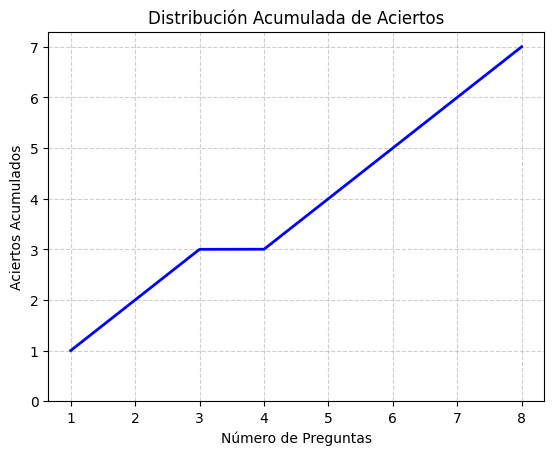

In [140]:
import numpy as np
import matplotlib.pyplot as plt

similitudes_t = (similitud1, similitud2, similitud3, similitud4, similitud5, similitud6, similitud7, similitud8)

resultado = []

aciertos = 0
for prob in similitudes_t:
    if prob >= 0.78:
        aciertos += 1
    resultado.append(aciertos)
print("Resultado acumulado de aciertos:", resultado)
x = np.arange(1, len(resultado) + 1)
from scipy.interpolate import interp1d
f = interp1d(x, resultado, kind='linear')
x_smooth = np.linspace(1, len(resultado), 500)  # 500 puntos entre 1 y 8
y_smooth = f(x_smooth)
plt.plot(x_smooth, y_smooth, marker='', linestyle='-', color='b', lw=2)
plt.title("Distribución Acumulada de Aciertos")
plt.xlabel("Número de Preguntas")
plt.ylabel("Aciertos Acumulados")
plt.xticks(np.arange(1, len(resultado) + 1))
plt.yticks(np.arange(0, max(resultado)+1, 1))
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


In [141]:
print("Resultado acumulado de aciertos:", resultado)
accuracy = f"El accuracy de el chatbot es de: {max(resultado)/8}"
print(accuracy)

Resultado acumulado de aciertos: [1, 2, 3, 3, 4, 5, 6, 7]
El accuracy de el chatbot es de: 0.875
